In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import matplotlib._png as png

In [4]:
image = png.read_png_int("zadanie.png")

In [5]:
def encrypt(text, image):
    s0 = image.shape[0]
    s1 = image.shape[1]
    s2 = image.shape[2]
    image_encrypted_dummy = np.reshape(image, (s0*s1*s2))
    image_encrypted_dummy = np.ubyte(image_encrypted_dummy)
    image_encrypted = np.zeros(s0*s1*s2, dtype=np.ubyte)
    if len(text) > image_encrypted.shape[0]/4:
        print("Text to long for given picuture")
        return 0
    else:
        i = 0
        for c in text:
            for j in range(4):
                c_mask = (ord(c) & (0b00000011 << j*2)) >> j*2
                image_encrypted[4*i+j] = (image_encrypted_dummy[4*i+j] & 0b11111100) | c_mask
            i+=1
        #fill the rest
        image_encrypted[4*i:] = image_encrypted_dummy[4*i:]
        image_encrypted = np.reshape(image_encrypted, (s0, s1, s2))
        for x in range(0, 16):
            c_mask = (i & (0b00000011 << x*2)) >> x*2
            image_encrypted_dummy[x] = (image_encrypted_dummy[x] & 0b11111100) | c_mask
        image_encrypted_dummy = np.reshape(image_encrypted_dummy, (s0, s1, s2))
        return [image_encrypted_dummy, np.ubyte(image_encrypted)]
                    
def show_images(img):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

    ax1.imshow(img[0])
    ax1.set_title('Original Image')
    ax2.imshow(img[1])
    ax2.set_title('Encrypted image')
    
    
def decrypt(encrypted_images):
    s0 = images[0].shape[0]
    s1 = images[0].shape[1]
    s2 = images[0].shape[2]
    image_encrypted_dummy = np.reshape(encrypted_images[0], (s0*s1*s2))
    image_encrypted = np.reshape(encrypted_images[1], (s0*s1*s2))
    how_many = 0
    for x in range(0, 16):
            how_many += (image_encrypted_dummy[x] & 0b00000011) << 2*x
    text = ''
    for i in tqdm.tqdm(range(0, how_many)):
        char = 0
        for j in range(4):
                char += (image_encrypted[4*i+j] & 0b00000011) << 2*j
        text+=chr(char)
    return text

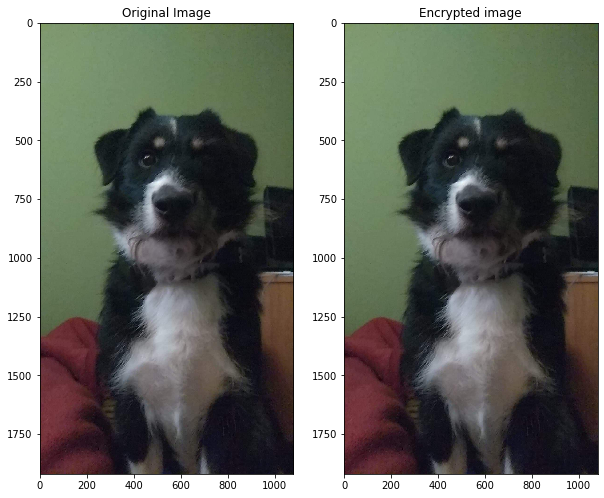

In [8]:
images = encrypt("Super tajna wiadomosc, ktorej nikt nie powinien widziec, poniewaz jest ona super tajna.", image)
show_images(images)

In [9]:
decrypt(images)

100%|██████████| 87/87 [00:00<00:00, 7410.58it/s]


'Super tajna wiadomosc, ktorej nikt nie powinien widziec, poniewaz jest ona super tajna.'